<a href="https://colab.research.google.com/github/20-hayato/machine_learning_test/blob/main/lesson5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

#乳がんに関するデータセット
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data,columns=cancer.feature_names )
df["Cancer"] = cancer.target

print(cancer.DESCR)               #データの説明

display(df)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


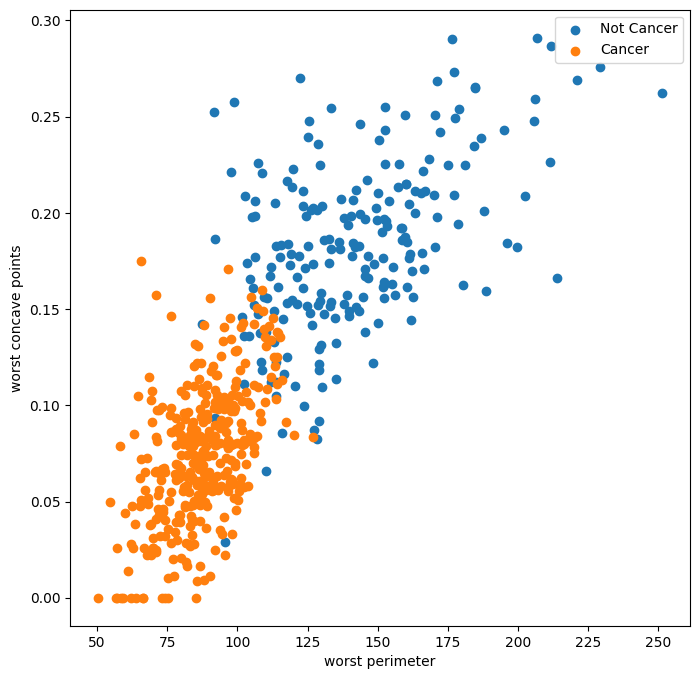

In [ ]:
fig = plt.figure(figsize=(8,8),dpi=100)

x3 = "worst area"
x2 = "worst concave points"
x1 = "worst perimeter"
x4 = "mean concave points"

plt.xlabel(x1)
plt.ylabel(x2)
plt.scatter(df[df["Cancer"]==0][x1],df[df["Cancer"]==0][x2],label="Not Cancer")
plt.scatter(df[df["Cancer"]==1][x1],df[df["Cancer"]==1][x2],label="Cancer")
plt.legend()
plt.show()


In [ ]:
#ロジスティック回帰

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#ロジスティック関数
def logistic(x1,x2,w0,w1,w2):
    return 1 /(1 + np.exp(-(w0+w1*x1+w2*x2)))

def calc(x1,w0,w1,w2):
    return -(w0 +w1*x1)/w2

sc = StandardScaler()
df2 = pd.DataFrame(sc.fit_transform(df[df.columns[df.columns != 'Cancer']] ))
df2.index = df.index
df2.columns = df.columns[df.columns != 'Cancer']
# 前回の結果から
drop_list = ['concave points error','symmetry error','concavity error','texture error','mean compactness','worst area','worst compactness','mean area']
df2 = df2.drop(drop_list,axis=1)

X = df2 # 説明変数
Y = df['Cancer'] # 目的変数
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

tuned_parameters = [
    {'solver': ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],'penalty' : ['l1','l2'], 'max_iter': [10,20,30,40,50,60,70,80], 'tol': [1e-1,1e-2,1e-3], 'C':[0.1,1],'class_weight': ['balanced']}
    ]

clf = GridSearchCV(
    LogisticRegression(), # 識別器
    tuned_parameters, # 最適化したいパラメータセット
    cv=5, # 交差検定の回数
    scoring='f1' ) # モデルの評価関数の指定

clf.fit(X_train, Y_train)

#ハイパーパラメータを変えた検証の結果
num = len(clf.cv_results_['params'])
for i in range(num):
    print(i,"\t",clf.cv_results_['params'][i],"\t",clf.cv_results_['mean_test_score'][i])

#最適化されたパラメータ
print("Best Parameter:",clf.best_params_)

best = clf.best_estimator_
Y_pred = best.predict(X_test)
print(classification_report(Y_test, Y_pred))


print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))


# fig = plt.figure(figsize=(8,8),dpi=100)
# sc = StandardScaler()
# plt.xlabel(x1)
# plt.ylabel(x2)
# plt.xlim(-3.0,5.0)
# plt.ylim(-3.0,5.0)
# plt.scatter(df2[df["Cancer"]==0][x1+"_std"],df[df["Cancer"]==0][x2+"_std"],label="Not Cancer")
# plt.scatter(df2[df["Cancer"]==1][x1+"_std"],df[df["Cancer"]==1][x2+"_std"],label="Cancer")


# x1_ = np.linspace(-3, 5, 100)
# y = calc(x1_,best.intercept_,best.coef_[0][0],best.coef_[0][1])
# plt.plot(x1_, y,color='green')
# plt.legend()

# plt.show()

importance = pd.DataFrame({
    'Feature': df2.columns.values,
    'Coefficient': best.coef_[0]
})
# 係数の絶対値が大きい順に並べ替え
importance = importance.reindex(importance.Coefficient.abs().sort_values(ascending=False).index)
display(importance)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

0 	 {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.1} 	 nan
1 	 {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.01} 	 nan
2 	 {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l1', 'solver': 'lbfgs', 'tol': 0.001} 	 nan
3 	 {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1} 	 0.9759799587385795
4 	 {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01} 	 0.9775981500775035
5 	 {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001} 	 0.9775981500775035
6 	 {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l1', 'solver': 'newton-cg', 'tol': 0.1} 	 nan
7 	 {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l1', 'solver': 'newton-cg', 'tol': 0.01} 	 nan
8 	 {'C': 0.1, 'class_we

,Feature,Coefficient
14,worst radius,-0.584068
19,worst concave points,-0.579841
16,worst perimeter,-0.554311
15,worst texture,-0.535231
8,radius error,-0.515929
5,mean concave points,-0.484219
0,mean radius,-0.467350
2,mean perimeter,-0.459398
9,perimeter error,-0.419087
10,area error,-0.412063


In [ ]:
#SVM

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


sc = StandardScaler()
df2 = pd.DataFrame(sc.fit_transform(df.drop("Cancer", axis=1)))
df2.index = df.index
df2.columns = df.columns[df.columns!="Cancer"]



X = df2 # 説明変数
Y = df['Cancer'] # 目的変数
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする


#最適化したいハイパーパラメータの組み合わせ
#C:正則化項の重み
#kernel: カーネル関数
#gamma: カーネル関数の係数

tuned_parameters = [
    {'C': [0.01,0.1,1, 10], 'kernel': ['linear']},
    {'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf','sigmoid'], 'gamma': [0.001, 0.0001, 'scale', 'auto']},
    {'C': [0.01, 0.1, 1, 10], 'kernel': ['poly'], 'gamma': [0.001, 0.0001, 'scale', 'auto'],'degree': [2,3,4,5,6]}
    ]

clf = GridSearchCV(
    SVC(), # 識別器
    tuned_parameters, # 最適化したいパラメータセット
    cv=5, # 交差検定の回数
    scoring='f1' ) # モデルの評価関数の指定

clf.fit(X_train, Y_train)

#ハイパーパラメータを変えた検証の結果
num = len(clf.cv_results_['params'])
for i in range(num):
    print(i,"\t",clf.cv_results_['params'][i],"\t",clf.cv_results_['mean_test_score'][i])

#最適化されたパラメータ
print("Best Parameter:",clf.best_params_)

best = clf.best_estimator_
y_pred = best.predict(X_test)
print(classification_report(Y_test, y_pred))

importance = pd.DataFrame({
    'Feature': df[df.columns[df.columns != 'Cancer']].columns.values,
    'Coefficient': best.coef_[0]
})
# 係数の絶対値が大きい順に並べ替え
importance = importance.reindex(importance.Coefficient.abs().sort_values(ascending=False).index)
display(importance)


0 	 {'C': 0.01, 'kernel': 'linear'} 	 0.9715116555096615
1 	 {'C': 0.1, 'kernel': 'linear'} 	 0.9846733304360423
2 	 {'C': 1, 'kernel': 'linear'} 	 0.974143529852239
3 	 {'C': 10, 'kernel': 'linear'} 	 0.9689408330051468
4 	 {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'} 	 0.7785234899328859
5 	 {'C': 0.01, 'gamma': 0.001, 'kernel': 'sigmoid'} 	 0.7785234899328859
6 	 {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'} 	 0.7785234899328859
7 	 {'C': 0.01, 'gamma': 0.0001, 'kernel': 'sigmoid'} 	 0.7785234899328859
8 	 {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'} 	 0.7785234899328859
9 	 {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'} 	 0.9150385225885225
10 	 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 	 0.7785234899328859
11 	 {'C': 0.01, 'gamma': 'auto', 'kernel': 'sigmoid'} 	 0.9135655067155067
12 	 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'} 	 0.8346018648652732
13 	 {'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'} 	 0.7848790778458886
14 	 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

,Feature,Coefficient
10,radius error,-0.472862
12,perimeter error,-0.379155
21,worst texture,-0.356056
13,area error,-0.351628
26,worst concavity,-0.320473
6,mean concavity,-0.304746
28,worst symmetry,-0.300720
20,worst radius,-0.290663
1,mean texture,-0.283873
30,worst area_std,-0.280267


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


X = df[df.columns[df.columns != 'Cancer']] # 説明変数
Y = df['Cancer'] # 目的変数
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする


tuned_parameters = [
    {'n_estimators': [50,51,52,53,54,55,56,57,58,59,60],'criterion': ['gini','entropy','log_loss'],'max_depth':[50,60,70,80],'max_features':['auto', 'sqrt', 'log2', 0.2, 0.5, 0.8, None]}
    ]

clf = GridSearchCV(
    RandomForestClassifier(), # 識別器
    tuned_parameters, # 最適化したいパラメータセット
    cv=5, # 交差検定の回数
    scoring='f1' ) # モデルの評価関数の指定

clf.fit(X_train, Y_train)

#ハイパーパラメータを変えた検証の結果
num = len(clf.cv_results_['params'])
for i in range(num):
    print(i,"\t",clf.cv_results_['params'][i],"\t",clf.cv_results_['mean_test_score'][i])

#最適化されたパラメータ
print("Best Parameter:",clf.best_params_)

best = clf.best_estimator_
y_pred = best.predict(X_test)
print(classification_report(Y_test, y_pred))

#説明変数の重要度
importanceDF = pd.DataFrame(columns=["item","importance"])
features = df[df.columns[df.columns != 'Cancer']].columns.values
for n, v in zip(features, best.feature_importances_):
    importanceDF = importanceDF._append(pd.Series([n,v], index = importanceDF.columns ), ignore_index=True )

display(importanceDF.sort_values("importance", ascending=False))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

0 	 {'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 50} 	 0.9624133323887059
1 	 {'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 51} 	 0.9642898518208909
2 	 {'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 52} 	 0.964326734937616
3 	 {'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 53} 	 0.9622880191054977
4 	 {'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 54} 	 0.9625802188151462
5 	 {'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 55} 	 0.9678314564692272
6 	 {'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 56} 	 0.9677750107996849
7 	 {'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 57} 	 0.9626976227253546
8 	 {'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 58} 	 0.9609028820547258
9 	 {'criterion': 'gini', 'ma

,item,importance
22,worst perimeter,0.134274
27,worst concave points,0.125037
7,mean concave points,0.095804
23,worst area,0.093589
6,mean concavity,0.092903
20,worst radius,0.073375
2,mean perimeter,0.054285
3,mean area,0.051245
26,worst concavity,0.037477
21,worst texture,0.028950
